# Install dan Import Library

In [1]:
# Install Library
!pip install tensorflow

In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load Data

In [3]:
# Import Dataset
url = "https://drive.google.com/uc?id=1Z-GyP97cYAj1UVIBvNfc0jfvEnw_8PBa"
data = pd.read_csv(url)

# EDA (Exploratory Data Analysis)

In [4]:
# 5 Baris Pertama Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# Statistik Deskriptif
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


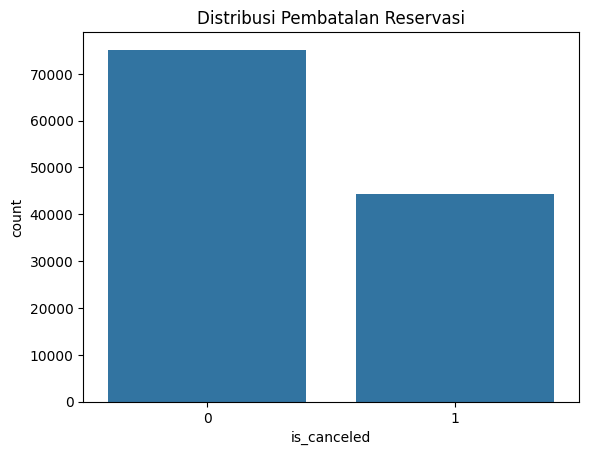

In [7]:
# Distribusi Pembatalan
sns.countplot(x='is_canceled', data=data)
plt.title('Distribusi Pembatalan Reservasi')
plt.show()

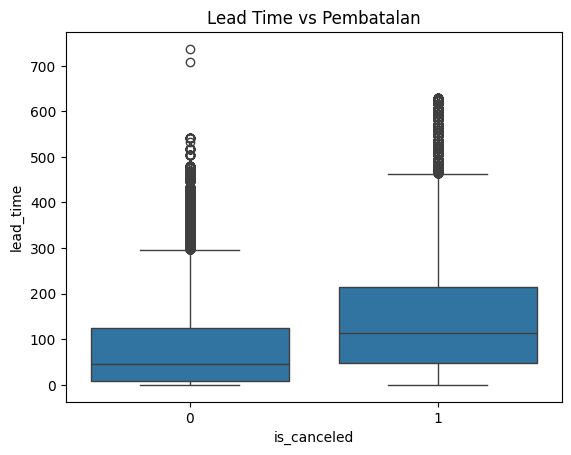

In [8]:
# Hubungan Lead Time dengan Pembatalan
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time vs Pembatalan')
plt.show()

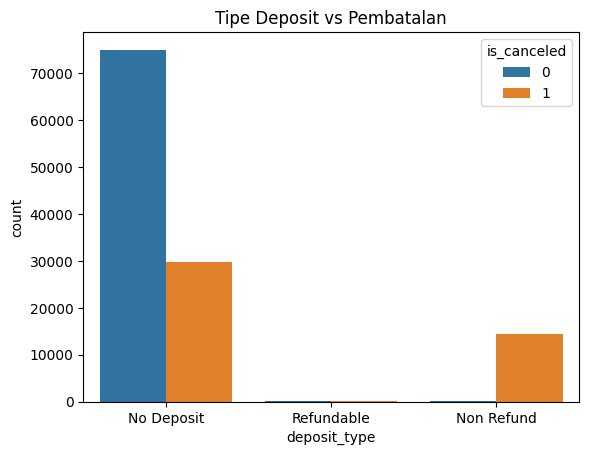

In [9]:
# Hubungan Tipe Deposit dengan Pembatalan
sns.countplot(x='deposit_type', hue='is_canceled', data=data)
plt.title('Tipe Deposit vs Pembatalan')
plt.show()

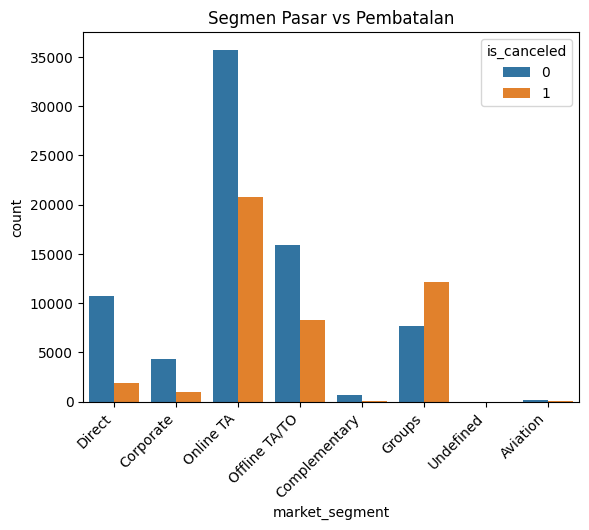

In [10]:
# Hubungan Segmen Pasar dengan Pembatalan
sns.countplot(x='market_segment', hue='is_canceled', data=data)
plt.title('Segmen Pasar vs Pembatalan')
plt.xticks(rotation=45, ha='right')
plt.show()

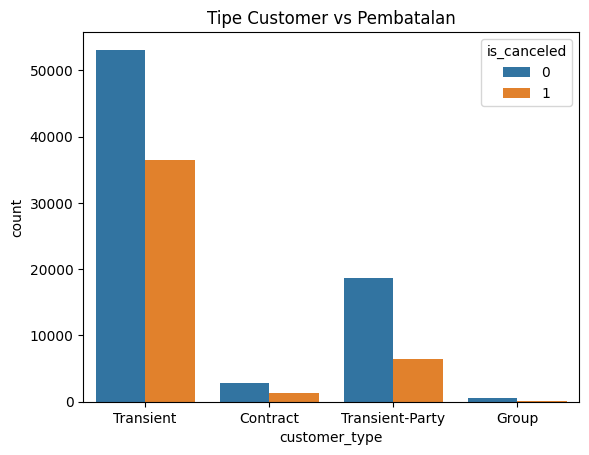

In [11]:
# Hubungan Tipe Customer dengan Pembatalan
sns.countplot(x='customer_type', hue='is_canceled', data=data)
plt.title('Tipe Customer vs Pembatalan')
plt.show()

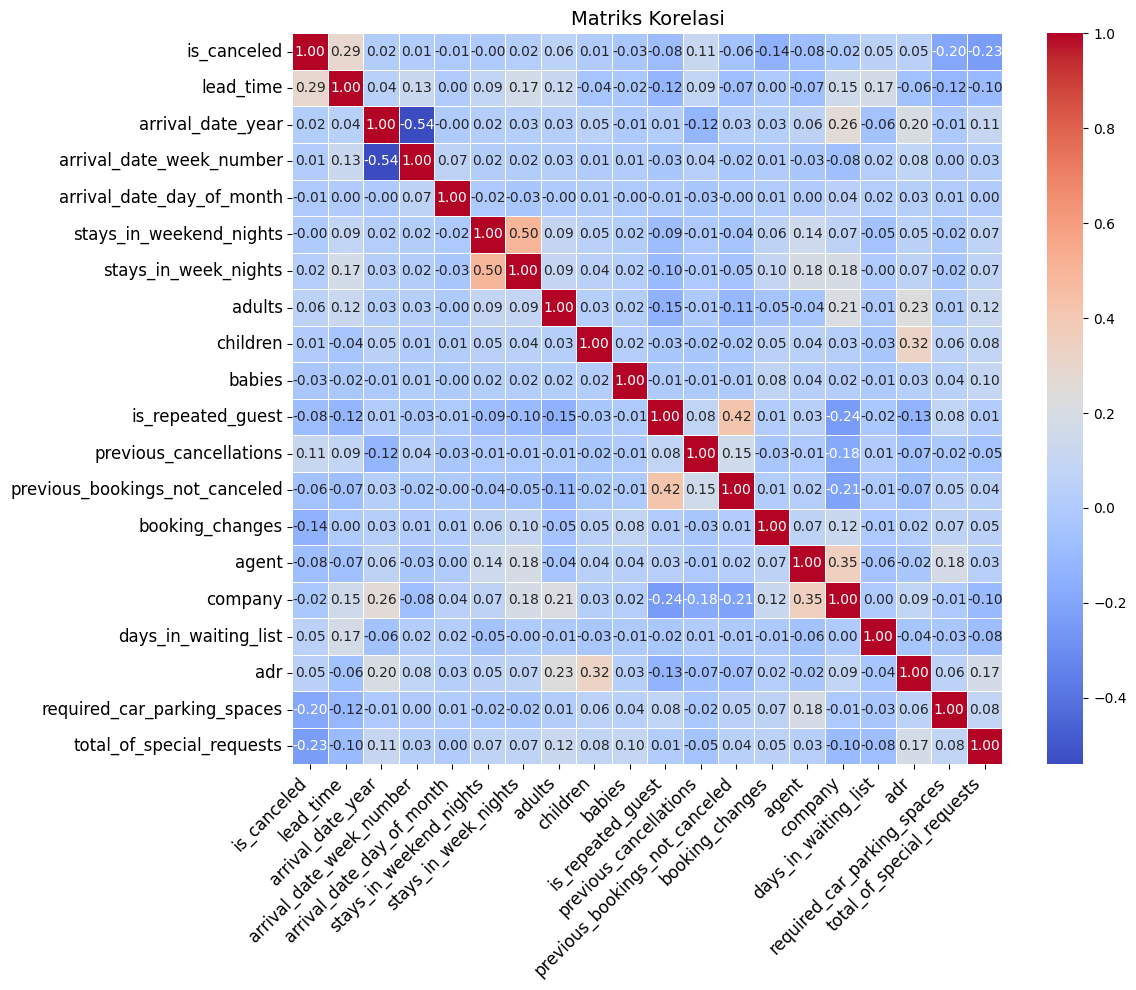

In [12]:
# Korelasi Antar Fitur

# Hanya fitur numerik untuk perhitungan korelasi
numerical_data = data.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Visualisasi matriks korelasi dengan peningkatan tampilan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 10})
plt.title('Matriks Korelasi', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


# Prepocessing

In [14]:
# Select relevant features and target variable
selected_columns = ['lead_time', 'deposit_type', 'market_segment', 'customer_type', 'is_canceled']
df = data[selected_columns].copy()

In [15]:
# Handle missing values
df.dropna(inplace=True)

In [16]:
# Encode categorical features
categorical_cols = ['deposit_type', 'market_segment', 'customer_type']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [17]:
# Split data
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [18]:
# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

## FFNN (Feedforward Neural Network)

In [19]:
# Model FFNN
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_ffnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train model
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6900 - loss: 0.6240 - val_accuracy: 0.7422 - val_loss: 0.5013
Epoch 2/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7349 - loss: 0.5297 - val_accuracy: 0.7429 - val_loss: 0.4971
Epoch 3/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7376 - loss: 0.5209 - val_accuracy: 0.7504 - val_loss: 0.4966
Epoch 4/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7424 - loss: 0.5142 - val_accuracy: 0.7528 - val_loss: 0.4926
Epoch 5/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7473 - loss: 0.5064 - val_accuracy: 0.7544 - val_loss: 0.4904
Epoch 6/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7455 - loss: 0.5037 - val_accuracy: 0.7351 - val_loss: 0.5036
Epoch 7/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7504 - loss: 0.4957 - val_accuracy: 0.7541 - val_loss: 0.4851
Epoch 8/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7475 - loss: 0.4969 - 

In [21]:
# Classification Report
y_pred_ffnn = model_ffnn.predict(X_test)
y_pred_ffnn = (y_pred_ffnn > 0.5).astype(int)

print(classification_report(y_test, y_pred_ffnn))

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.94      0.83     14907
           1       0.83      0.45      0.59      8971

    accuracy                           0.76     23878
   macro avg       0.79      0.70      0.71     23878
weighted avg       0.77      0.76      0.74     23878



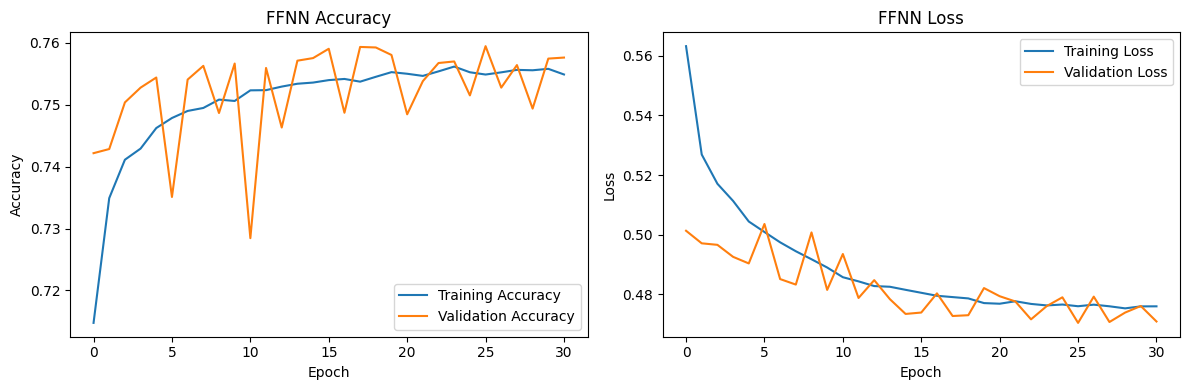

In [22]:
# Plot Accuracy dan Loss
plt.figure(figsize=(12, 4))

# Plot Acc
plt.subplot(1, 2, 1)
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('FFNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## DNN (Deep Neural Network)

In [23]:
# Membuat model DNN
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Train model
history_dnn = model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6335 - loss: 0.7511 - val_accuracy: 0.6785 - val_loss: 0.5865
Epoch 2/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7196 - loss: 0.5513 - val_accuracy: 0.7484 - val_loss: 0.5094
Epoch 3/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7457 - loss: 0.5145 - val_accuracy: 0.7484 - val_loss: 0.5013
Epoch 4/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7469 - loss: 0.5087 - val_accuracy: 0.7484 - val_loss: 0.4971
Epoch 5/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7477 - loss: 0.5048 - val_accuracy: 0.7484 - val_loss: 0.5142


In [25]:
# Classification Report
y_pred_dnn = model_dnn.predict(X_test)
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)

print(classification_report(y_test, y_pred_dnn))

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     14907
           1       0.79      0.20      0.31      8971

    accuracy                           0.68     23878
   macro avg       0.73      0.58      0.55     23878
weighted avg       0.71      0.68      0.61     23878



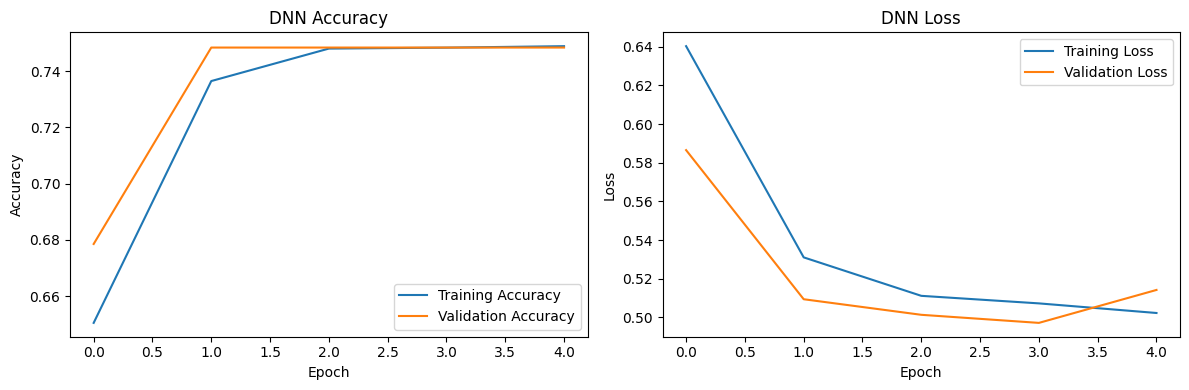

In [26]:
# Plot Accuracy dan Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Random Forest

In [27]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Memilih Fitur
sfm = SelectFromModel(rf, prefit=True)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [29]:
# Model Random Forest
model_rf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model_rf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Train model
history_rf = model_rf.fit(X_train_selected, y_train, epochs=50, batch_size=32, validation_data=(X_test_selected, y_test), callbacks=[early_stopping])

Epoch 1/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6934 - loss: 0.6199 - val_accuracy: 0.7294 - val_loss: 0.5179
Epoch 2/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7301 - loss: 0.5454 - val_accuracy: 0.7386 - val_loss: 0.5120
Epoch 3/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7334 - loss: 0.5369 - val_accuracy: 0.7484 - val_loss: 0.5175
Epoch 4/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7369 - loss: 0.5293 - val_accuracy: 0.7484 - val_loss: 0.5465
Epoch 5/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7371 - loss: 0.5287 - val_accuracy: 0.7484 - val_loss: 0.5076


In [33]:
# Classification Report
y_pred_rf = model_rf.predict(X_test_selected)
y_pred_rf = (y_pred_rf > 0.5).astype(int)

print(classification_report(y_test, y_pred_rf))

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.73      0.90      0.81     14907
           1       0.73      0.44      0.55      8971

    accuracy                           0.73     23878
   macro avg       0.73      0.67      0.68     23878
weighted avg       0.73      0.73      0.71     23878



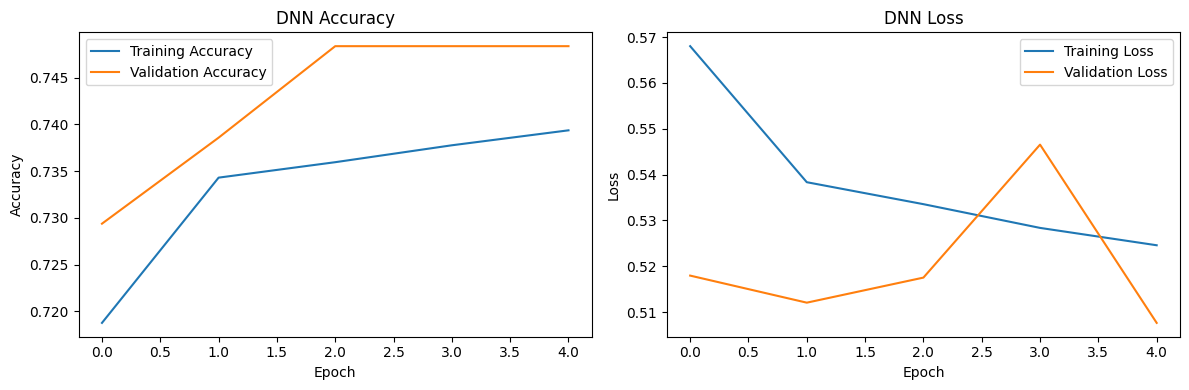

In [34]:
# Plot Accuracy dan Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_rf.history['accuracy'], label='Training Accuracy')
plt.plot(history_rf.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_rf.history['loss'], label='Training Loss')
plt.plot(history_rf.history['val_loss'], label='Validation Loss')
plt.title('DNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Perbandingan Prediksi Model

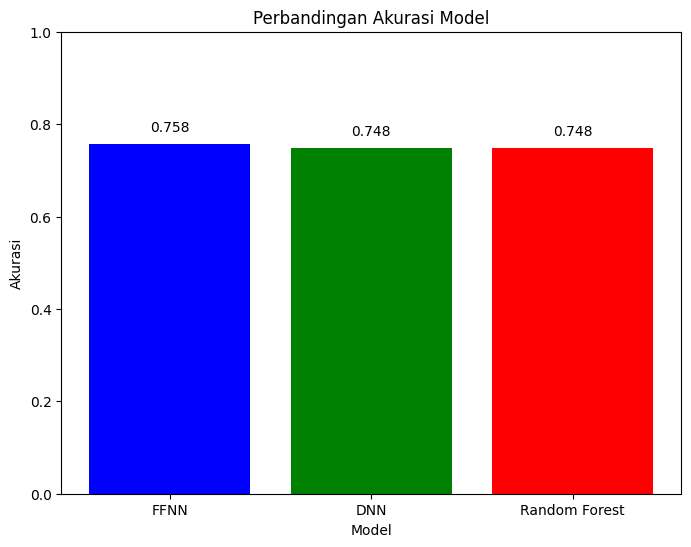

In [36]:
model_names = ['FFNN', 'DNN', 'Random Forest']
accuracies = [history_ffnn.history['val_accuracy'][-1], history_dnn.history['val_accuracy'][-1], history_rf.history['val_accuracy'][-1]]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim([0, 1])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

# Test Prediksi dengan Model

In [40]:
# Mengambil beberapa data dari dataset
sample_data = X_test.sample(10)
sample_data_indices = sample_data.index

# Mengambil nilai target (is_canceled) dari data yang dipilih
actual_results = y_test.loc[sample_data_indices].values

# Melakukan prediksi menggunakan model FFNN
predicted_results_ffnn = model_ffnn.predict(sample_data)
predicted_results_ffnn = (predicted_results_ffnn > 0.5).astype(int)

# Melakukan prediksi menggunakan model DNN
predicted_results_dnn = model_dnn.predict(sample_data)
predicted_results_dnn = (predicted_results_dnn > 0.5).astype(int)

# Melakukan prediksi menggunakan model Random Forest
sample_data_selected = sfm.transform(sample_data)
predicted_results_rf = model_rf.predict(sample_data_selected)
predicted_results_rf = (predicted_results_rf > 0.5).astype(int)


# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Actual': actual_results,
    'FFNN Prediction': predicted_results_ffnn.flatten(),
    'DNN Prediction': predicted_results_dnn.flatten(),
    'Random Forest Prediction': predicted_results_rf.flatten()
}, index=sample_data_indices)

# Menampilkan DataFrame perbandingan
comparison_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Actual,FFNN Prediction,DNN Prediction,Random Forest Prediction
68105,1,0,0,0
114145,0,0,0,1
73930,1,0,1,1
25360,0,0,0,0
23538,0,0,0,0
87074,0,0,0,0
34291,0,0,0,0
72962,1,0,0,0
10098,1,0,0,0
106130,0,0,0,0
